# 25-9-24      : Practical 3.4.7 - Deep Learning Using Tensor Flow

## Faraz Syed | J008 | 40518220007

# Solution-03

In [ ]:
!pip install tensorflow

In [3]:
import numpy as np
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding

In [35]:
reviews=['Accurate tracking,motivates me daily',
        'Stylish design,great for workouts',
        'Long battery life,very convenient',
        'User_friendly app,insightful health data',
        'Reliable heart rate moniter,excellent',
        'GPS connections often drops unexpectedly',
        'Inconsistent heart rate readings frustrating',
        'Band uncomfortable during extended wear',
        'Limited features compared to competitors',
        'Sync issues with smartphone app']
sentiment=np.array([1,1,1,1,1,0,0,0,0,0])

In [36]:
one_hot('Inconsistent heart rate readings frustrating',50) #frustrating=34 

[25, 37, 39, 31, 34]

In [37]:
one_hot('Band uncomfortable during extended wear',50) #uncomfortable=5

[11, 5, 23, 4, 10]

In [38]:
vocab_size=50
encoded_reviews=[one_hot(d,vocab_size) for d in reviews]
print(encoded_reviews)
encoded_reviews

[[25, 32, 20, 3, 6], [4, 46, 12, 40, 22], [13, 15, 42, 25, 11], [27, 35, 3, 7, 32, 45], [27, 37, 39, 11, 23], [22, 5, 45, 19, 14], [25, 37, 39, 31, 34], [11, 5, 23, 4, 10], [8, 26, 24, 15, 6], [28, 29, 23, 43, 3]]


[[25, 32, 20, 3, 6],
 [4, 46, 12, 40, 22],
 [13, 15, 42, 25, 11],
 [27, 35, 3, 7, 32, 45],
 [27, 37, 39, 11, 23],
 [22, 5, 45, 19, 14],
 [25, 37, 39, 31, 34],
 [11, 5, 23, 4, 10],
 [8, 26, 24, 15, 6],
 [28, 29, 23, 43, 3]]

In [39]:
max_length=6
padded_reviews=pad_sequences(encoded_reviews,maxlen=max_length,padding='post')
print(padded_reviews)

[[25 32 20  3  6  0]
 [ 4 46 12 40 22  0]
 [13 15 42 25 11  0]
 [27 35  3  7 32 45]
 [27 37 39 11 23  0]
 [22  5 45 19 14  0]
 [25 37 39 31 34  0]
 [11  5 23  4 10  0]
 [ 8 26 24 15  6  0]
 [28 29 23 43  3  0]]


In [40]:
embeded_vector_size=6

model=Sequential()
model.add(Embedding(vocab_size,embeded_vector_size,input_length=max_length,name='embedding'))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))

In [41]:
x=padded_reviews
y=sentiment

In [42]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 6, 6)              300       
                                                                 
 flatten_2 (Flatten)         (None, 36)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 37        
                                                                 
Total params: 337 (1.32 KB)
Trainable params: 337 (1.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
model.fit(x,y,epochs=50,verbose=0)

In [44]:
#evaulate the model
loss,accuracy=model.evaluate(x,y)
accuracy

1/1 [==============================] - 0s 346ms/step - loss: 0.5719 - accuracy: 1.0000


1.0

In [45]:
weights=model.get_layer('embedding').get_weights()[0]

In [46]:
len(weights)

50

In [47]:
weights[34] #frustrating=34 

array([ 0.08655718, -0.01741492,  0.07664311,  0.01919024, -0.04914737,
       -0.09736311], dtype=float32)

In [48]:
weights[5] #uncomfortable=5

array([ 0.08929397,  0.06245453,  0.0633489 ,  0.00877007, -0.03091801,
       -0.09654111], dtype=float32)

# Solution-01

In [10]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Admin\Downloads\MBA (2).csv")
df.head(4)

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620,3,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680,5,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710,5,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690,6,Technology,NaN


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [12]:
# Step 1: Convert NaN to 'Deny'
df['admission'].fillna('Deny', inplace=True)

# Step 2: Remove rows with 'Waitlist'
df = df[df['admission'] != 'Waitlist']

print(df)

      application_id  gender  international   gpa       major      race  gmat  \
0                  1  Female          False  3.30    Business     Asian   620   
1                  2    Male          False  3.28  Humanities     Black   680   
2                  3  Female           True  3.30    Business       NaN   710   
3                  4    Male          False  3.47        STEM     Black   690   
4                  5    Male          False  3.35        STEM  Hispanic   590   
...              ...     ...            ...   ...         ...       ...   ...   
6189            6190    Male          False  3.49    Business     White   640   
6190            6191    Male          False  3.18        STEM     Black   670   
6191            6192  Female           True  3.22    Business       NaN   680   
6192            6193    Male           True  3.36    Business       NaN   590   
6193            6194    Male          False  3.23        STEM  Hispanic   650   

      work_exp          wor

In [13]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
label_cols = ['gender', 'major', 'race', 'work_industry', 'admission']
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to string before encoding
    label_encoders[col] = le

print(df)


      application_id  gender  international   gpa  major  race  gmat  \
0                  1       0          False  3.30      0     0   620   
1                  2       1          False  3.28      1     1   680   
2                  3       0           True  3.30      0     5   710   
3                  4       1          False  3.47      2     1   690   
4                  5       1          False  3.35      2     2   590   
...              ...     ...            ...   ...    ...   ...   ...   
6189            6190       1          False  3.49      0     4   640   
6190            6191       1          False  3.18      2     1   670   
6191            6192       0           True  3.22      0     5   680   
6192            6193       1           True  3.36      0     5   590   
6193            6194       1          False  3.23      2     2   650   

      work_exp  work_industry  admission  
0            3              3          0  
1            5              6          1  
2     

In [14]:
# Separate features and target
X = df.drop(columns=['admission', 'application_id'])
y = df['admission']


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [16]:
from keras.models import Sequential
from keras.layers import Dense

# Build the ANN
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_scaled.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))  # Binary classification: Admit or Deny

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_scaled, y, epochs=50, batch_size=10, verbose=1)


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
610/610 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8386 - loss: 0.4078
Epoch 2/50
610/610 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8536 - loss: 0.3271
Epoch 3/50
610/610 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8494 - loss: 0.3277
Epoch 4/50
610/610 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8532 - loss: 0.3097
Epoch 5/50
610/610 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8537 - loss: 0.3129
Epoch 6/50
610/610 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8579 - loss: 0.3062
Epoch 7/50
610/610 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8601 - loss: 0.3035
Epoch 8/50
610/610 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8568 - loss: 0.3000
Epoch 9/50
610/610 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8457 - loss: 0.3175
Epoch 10/50
610/610 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8452 - loss: 0.3137
Epoch 11/50
610/610 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8525 - loss: 0.3046
Epoch 12/50
610/610 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

In [18]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [19]:
# Train the model on training data
model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)


Epoch 1/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8755 - loss: 0.2570
Epoch 2/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8811 - loss: 0.2501
Epoch 3/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8817 - loss: 0.2563
Epoch 4/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8807 - loss: 0.2402
Epoch 5/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8896 - loss: 0.2354
Epoch 6/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8768 - loss: 0.2508
Epoch 7/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8913 - loss: 0.2350
Epoch 8/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8793 - loss: 0.2473
Epoch 9/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8931 - loss: 0.2347
Epoch 10/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8820 - loss: 0.2400
Epoch 11/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8825 - loss: 0.2385
Epoch 12/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

In [20]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8617 - loss: 0.2824
Test Loss: 0.3069896996021271
Test Accuracy: 0.8515176177024841


In [23]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Confusion Matrix:
[[ 69  95]
 [ 86 969]]
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.42      0.43       164
           1       0.91      0.92      0.91      1055

    accuracy                           0.85      1219
   macro avg       0.68      0.67      0.67      1219
weighted avg       0.85      0.85      0.85      1219



| **Class**        | **Metric**     | **Value**                                                                         |
|------------------|----------------|-----------------------------------------------------------------------------------|
| **Class 0**      | Precision      | 0.45: When the model predicted class 0, it was correct 45% of the time.            |
|                  | Recall         | 0.42: The model correctly identified 42% of the actual class 0 instances.          |
|                  | F1-Score       | 0.43: A balance between precision and recall, indicating low performance for class 0. |
|                  | Support        | 164: Fewer examples, contributing to the lower performance.                        |
| **Class 1**      | Precision      | 0.91: When the model predicted class 1, it was correct 91% of the time.            |
|                  | Recall         | 0.92: The model correctly identified 92% of the actual class 1 instances.          |
|                  | F1-Score       | 0.91: A strong balance between precision and recall for class 1.                   |
|                  | Support        | 1055: More examples, contributing to better performance.                          |
| **Overall**      | Accuracy       | 0.85: The model correctly classified 85% of the total instances.                   |
| **Macro Avg**    | Precision      | 0.68: Average precision across both classes.                                       |
|                  | Recall         | 0.67: Average recall across both classes.                                          |
|                  | F1-Score       | 0.67: Average F1-Score across both classes.                                        |
| **Weighted Avg** | Precision      | 0.85: Precision weighted by the number of samples per class.                       |
|                  | Recall         | 0.85: Recall weighted by the number of samples per class.                          |
|                  | F1-Score       | 0.85: F1-Score weighted by the number of samples per class.                        |

---

**Key Insights**:

| **Observation**        | **Explanation**                                                                                                      |
|------------------------|----------------------------------------------------------------------------------------------------------------------|
| **Class Imbalance**     | The model performs well on class 1 but struggles with class 0 due to class imbalance (fewer class 0 samples).        |
| **Low Recall for Class 0** | The recall for class 0 is only 0.42, meaning the model fails to identify a significant portion of class 0 instances. |
| **Potential Solutions** | - Address class imbalance with techniques like oversampling or undersampling.                                        |
|                        | - Use alternative metrics like precision-recall curves, F1-score, or AUC.                                             |
|                        | - Consider model tuning (e.g., adjusting class weights) to improve performance for class 0.                          |


# Solution - 02

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [2]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape the data to include a single channel (grayscale)
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to the range 0-1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 6s 1us/step


In [3]:
# Define the CNN model
model = models.Sequential()

# First convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output
model.add(layers.Flatten())

# Fully connected layer
model.add(layers.Dense(64, activation='relu'))

# Output layer (for 10 classes)
model.add(layers.Dense(10, activation='softmax'))


C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
# Train the model
history = model.fit(train_images, train_labels, epochs=5, 
                    batch_size=64, 
                    validation_split=0.2)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.8617 - loss: 0.4608 - val_accuracy: 0.9788 - val_loss: 0.0702
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9832 - loss: 0.0566 - val_accuracy: 0.9838 - val_loss: 0.0555
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9883 - loss: 0.0385 - val_accuracy: 0.9871 - val_loss: 0.0447
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9911 - loss: 0.0286 - val_accuracy: 0.9878 - val_loss: 0.0409
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9929 - loss: 0.0232 - val_accuracy: 0.9881 - val_loss: 0.0421


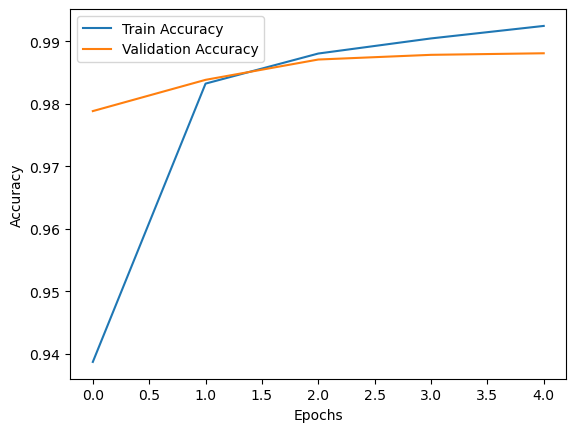

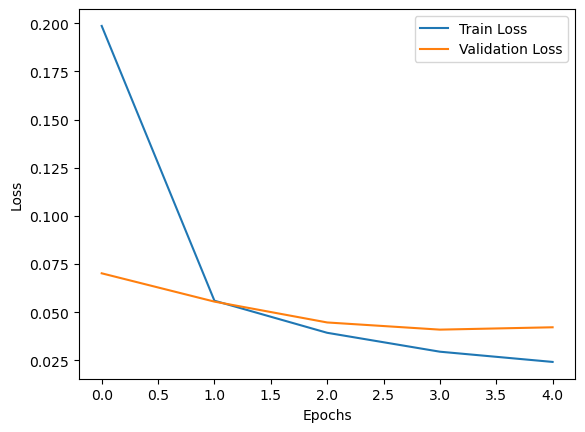

In [6]:
# Plot training & validation accuracy and loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#### First plot
| **Observation**             | **Training Accuracy**                              | **Validation Accuracy**                              |
|-----------------------------|----------------------------------------------------|-----------------------------------------------------|
| **Starting Accuracy**        | Starts around 0.94 (94%) at epoch 0.               | Starts around 0.98 (98%) at epoch 0.                |
| **Accuracy Trend**           | Steadily increases to above 0.99 (99%) by epoch 4. | Slightly increases up to 0.985 (98.5%) by epoch 4.  |
| **Generalization**           | The model quickly learns to classify the training data well. | Remains fairly stable, showing good generalization to unseen data. |
| **Overfitting Signs**        | After epoch 2, the training accuracy rises slightly beyond the validation accuracy. | The validation accuracy stabilizes while the training accuracy continues to improve, suggesting minimal overfitting. |
| **Convergence**              | Training and validation accuracies are close to each other, indicating no significant overfitting. | The validation accuracy follows the training accuracy closely, with only a slight lag. |

---

**Key Insights:**
- **Convergence**: The training and validation accuracies are closely aligned, indicating that the model performs similarly on both training and validation data.
- **High Accuracy**: The model achieves very high accuracy on both datasets, suggesting it is well-trained for the task.
- **Slight Overfitting**: After epoch 2, the training accuracy continues to rise beyond the validation accuracy, but the difference is minimal, indicating slight overfitting.


#### second plot
| **Observation**             | **Training Loss**                                   | **Validation Loss**                                  |
|-----------------------------|----------------------------------------------------|----------------------------------------------------|
| **Starting Loss**            | Starts around 0.2.                                | Starts around 0.075.                               |
| **Loss Trend**               | Rapidly decreases after the first epoch, leveling off around 0.02 by epoch 4. | Gradually decreases, reaching a plateau around 0.05 by epoch 1.5 and remaining stable until epoch 4. |
| **Generalization**           | Shows the model is learning well and fitting the training data. | Indicates good generalization with stable performance on unseen data. |
| **Overfitting Signs**        | After epoch 3, the training loss keeps decreasing. | Slight increase after epoch 3, indicating slight overfitting. |
| **Convergence**              | Shows no significant issues, training continues improving slightly. | Flat or slight increase after epoch 3, showing possible signs of overfitting. |

---

**Conclusion:**
- **Good Fit**: Both losses decrease, showing effective learning.
- **Slight Overfitting**: After epoch 3, the difference between the training and validation loss suggests potential overfitting.
- **Recommendation**: Use techniques like early stopping or regularization to avoid overfitting as training progresses.
